<a href="https://colab.research.google.com/github/Orri050/Lokaverkefni/blob/main/Lokaverkefni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forritið

## Grunnur

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 17.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install plotly

In [3]:
import tensorflow as tf
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import datetime as dt
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit



## Val á hlutabréfi

In [59]:
choice = input('Write a stock symbol:')
choice = choice.upper()

Write a stock symbol:AAPL


## Hlutabréf gögn

In [68]:
data = yf.download(tickers=choice, start="2019-03-04", end="2022-04-30", interval='1d')
#data = yf.download(tickers=choice, period = 'max', interval = '1d', rounding= True)

[*********************100%***********************]  1 of 1 completed


In [69]:
data_Open=data[['Open']] #this returns a DataFrame, you don't need loc
data_dates=data.index.to_frame().reset_index(drop=True)
data_dates=data_dates.apply(pd.to_datetime)

### yf.ticker 

In [70]:
yf.pdr_override()
stock = yf.Ticker(choice)

In [71]:
stockh = stock.history(period='max',start="2019-03-04",end="2022-04-30", interval='1d')
#stockh = stock.history(period='max', interval='1d')
stockh

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-04,42.767356,43.268811,42.348665,42.806305,109744800,0.0,0.0
2019-03-05,42.828206,42.842811,42.487409,42.728401,78949600,0.0,0.0
2019-03-06,42.519060,42.718670,42.341361,42.482548,83241600,0.0,0.0
2019-03-07,42.324321,42.463075,41.873986,41.990829,99185600,0.0,0.0
2019-03-08,41.460160,42.129578,41.260549,42.090630,95997600,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0


In [72]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [73]:
stockh.index

DatetimeIndex(['2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15',
               ...
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14'],
              dtype='datetime64[ns]', name='Date', length=788, freq=None)

In [74]:
stockh_Open=stockh[['Open']] #this returns a DataFrame, you don't need loc
stockh_dates=stockh.index.to_frame().reset_index(drop=True)
stockh_dates=stockh_dates.apply(pd.to_datetime)

In [75]:
jon=stock.dividends
divi_dates=jon.index.to_frame().reset_index(drop=True)
divi_dates=divi_dates.apply(pd.to_datetime)
print(divi_dates)

         Date
0  2019-05-10
1  2019-08-09
2  2019-11-07
3  2020-02-07
4  2020-05-08
5  2020-08-07
6  2020-11-06
7  2021-02-05
8  2021-05-07
9  2021-08-06
10 2021-11-05
11 2022-02-04


## Open close

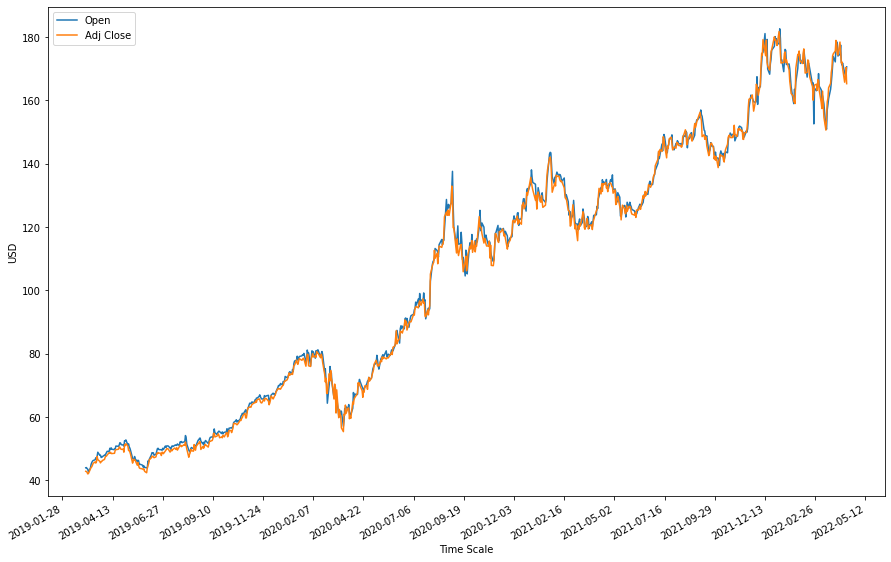

In [76]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=data_dates
plt.plot(x_dates, data['Open'], label='Open')
plt.plot(x_dates, data['Adj Close'], label='Adj Close')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## High low

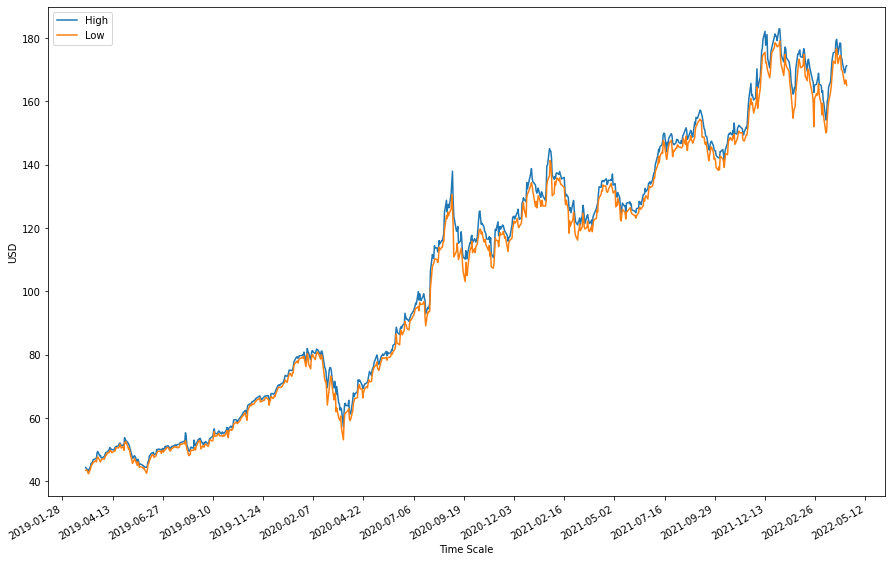

In [77]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=data_dates
plt.plot(x_dates, data['High'], label='High')
plt.plot(x_dates, data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Fyrsta spá

### Gagnaundirbúningur

In [78]:
target_y = data['Adj Close']
X_feat= data.iloc[:,0:5]
h_feat=data.iloc[:,4]

In [ ]:
h_feat

In [ ]:
X_feat

In [81]:
h_ft=np.array(h_feat)
h_ft=h_ft.reshape(-1,1)

In [82]:
sc= StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft,index=X_feat.index)


In [83]:
h_ft=sc.fit_transform(h_ft)

In [84]:
def lstm_split(data, n_steps):
  X, y=[], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps,:-1])
    y.append(data[i+n_steps-1,-1])

  return np.array(X), np.array(y)


In [116]:
X11, y11= lstm_split(X_ft.values, n_steps=1)

train_split=0.8
split_idx= int(np.ceil(len(X11)*train_split))
date_index=X_ft.index

Xtr1, Xtst1= X11[:split_idx], X11[split_idx:]
ytr1, ytst1= y11[:split_idx], y11[split_idx:]
Xtrd1, Xtstd1= date_index[:split_idx], date_index[split_idx:]

print(X11.shape, Xtr1.shape, Xtst1.shape, ytst1.shape)

(788, 1, 4) (631, 1, 4) (157, 1, 4) (157,)


### Modelið

In [120]:
model1 = keras.models.Sequential([
    keras.layers.LSTM(32,input_shape=(Xtr1.shape[1],Xtr1.shape[2]), activation="relu",return_sequences=True),
    keras.layers.Dense(1)])
model1.compile(loss="mean_squared_error", optimizer="adam")
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 32)             4736      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1=model1.fit(Xtr1,ytr1,epochs=100,validation_data=(Xtst1, ytst1),batch_size=4,verbose=2,shuffle=False)

In [123]:
ypr=model1.predict(Xtst1)
ypr=ypr.reshape(-1)

### Lærdómskúrva

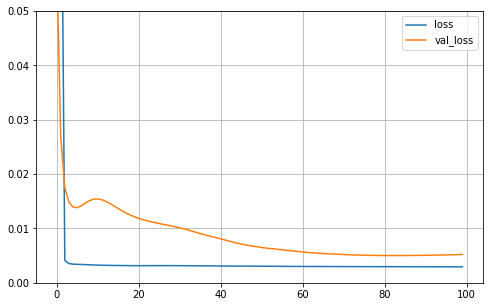

In [124]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.05)
plt.show()

### Samanburður á raunverulegu close og mati LSTM

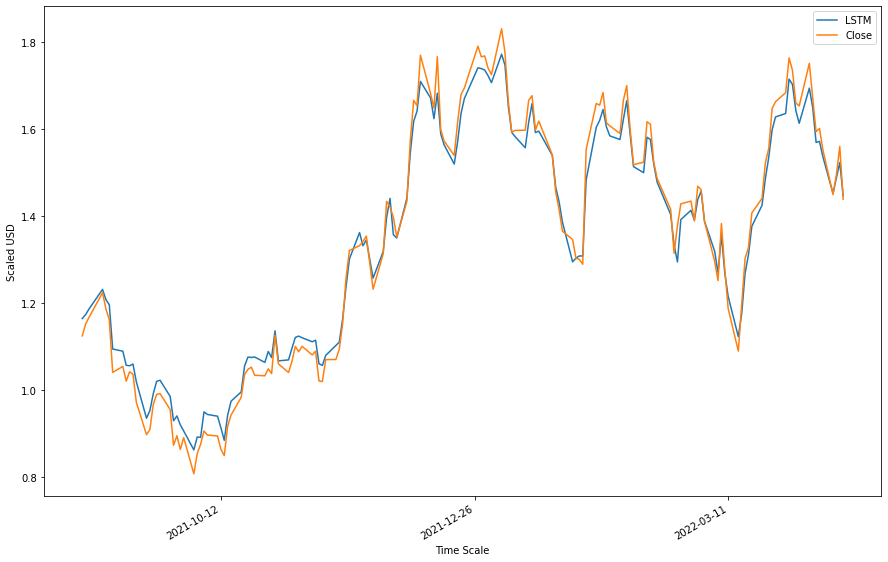

In [125]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr1)
x_dates=data_dates[k:]
#h=stockh['Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr, label='LSTM')
plt.plot(x_dates, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE VILLA

In [126]:
rmse=mean_squared_error(ytst1,ypr,squared=False)
mape=mean_absolute_percentage_error(ytst1,ypr)
print("RSME:",rmse)
print("MAPE:",mape)

RSME: 0.03197426759742748
MAPE: 0.02181158521430905


In [92]:
Villa1 = (rmse+mape)/2

## Önnur *spá*

### Þjálfun

In [93]:
model2 = keras.models.Sequential([
    keras.layers.LSTM(50,input_shape=(Xtr1.shape[1],Xtr1.shape[2]),return_sequences=True),
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)])
model2.compile(loss="mean_squared_error", optimizer="adam")
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 50)             11000     
                                                                 
 lstm_9 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [94]:
#history2=model2.fit(Xtr,ytr,epochs=100,batch_size=4,verbose=2,shuffle=False)

In [ ]:
history2 = model2.fit(Xtr1, ytr1, epochs=100, batch_size=50, validation_data=(Xtst1, ytst1), verbose=2, shuffle=False)

In [96]:
ypr2=model2.predict(Xtst1)
ypr2=ypr2.reshape(-1)

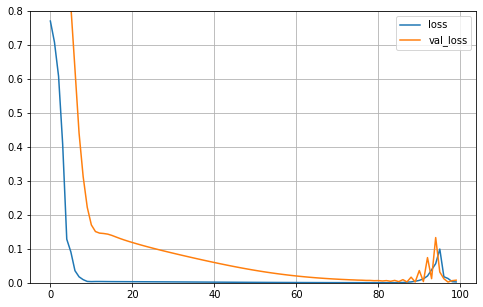

In [97]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.8)
plt.show()

### Samanburður á raunverulegu og LSTM

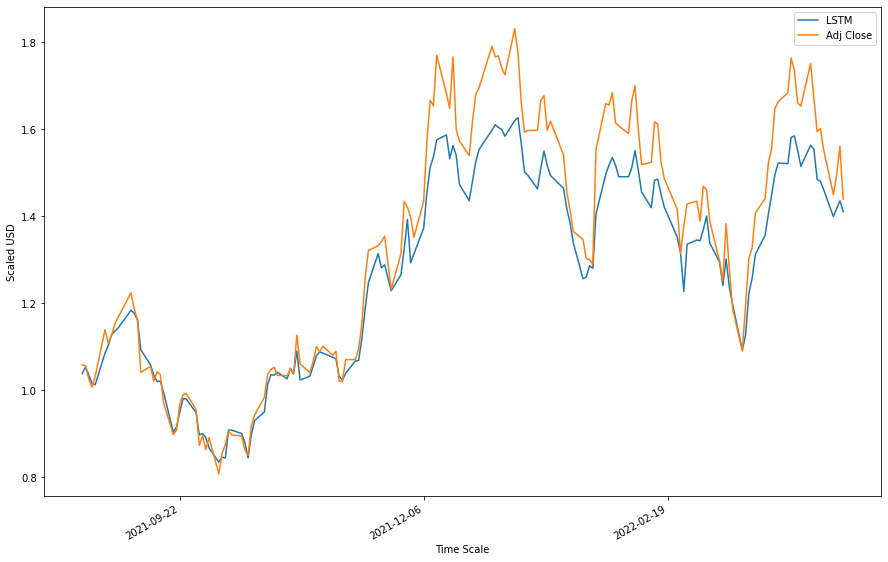

In [98]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr1)
x_dates=data_dates[k:]
#h=data['Adj Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr2, label='LSTM')
plt.plot(x_dates, h, label='Adj Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE VILLA

In [111]:
rmse2=mean_squared_error(ytst1,ypr2,squared=False)
mape2=mean_absolute_percentage_error(ytst1,ypr2)
print("RSME:",rmse2)
print("MAPE:",mape2)

RSME: 0.08794904793470394
MAPE: 0.04451373407741288


In [100]:
Villa2=(rmse2+mape2)/2

## Þriðja spá

### Þjálfun

In [101]:
n_steps=10
X12, y12= lstm_split(X_ft.values, n_steps=n_steps)

train_split=0.8
split_idx= int(np.ceil(len(X12)*train_split))
date_index=X_ft.index

Xtr2, Xtst2= X12[:split_idx], X12[split_idx:]
ytr2, ytst2= y12[:split_idx], y12[split_idx:]
Xtrd2, Xtstd2= date_index[:split_idx], date_index[split_idx:-n_steps+1]

print(X12.shape, Xtr2.shape, Xtst2.shape,Xtstd2.shape, ytst2.shape)

(779, 10, 4) (624, 10, 4) (155, 10, 4) (155,) (155,)


In [102]:
#model = Sequential()
#model.add(LSTM(50, return_sequences=True))
#model.add(Dropout(0.1))
#model.add(LSTM(50))
#model.add(Dropout(0.1))
#model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
#model3 = keras.models.Sequential([
    #keras.layers.LSTM(50,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    #keras.layers.LSTM(50,activation="relu"),
    #keras.layers.Dense(1)])
#model3.compile(loss="mean_squared_error", optimizer="adam")
#model3.summary()

In [104]:
model3 = keras.models.Sequential([
    keras.layers.LSTM(50,return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)])
model3.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
history3 = model3.fit(Xtr2, ytr2, epochs=100, batch_size=50, validation_data=(Xtst2, ytst2), verbose=2, shuffle=False)

In [106]:
ypr3=model3.predict(Xtst2)
ypr3=ypr3.reshape(-1)

### Lærdómskúrva

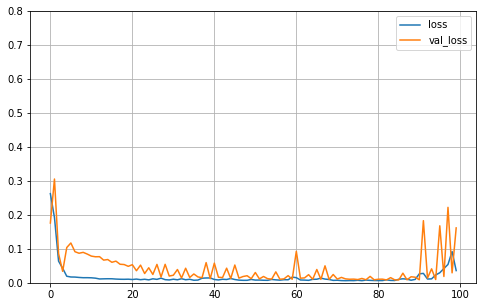

In [107]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.8)
plt.show()

### Samanburður

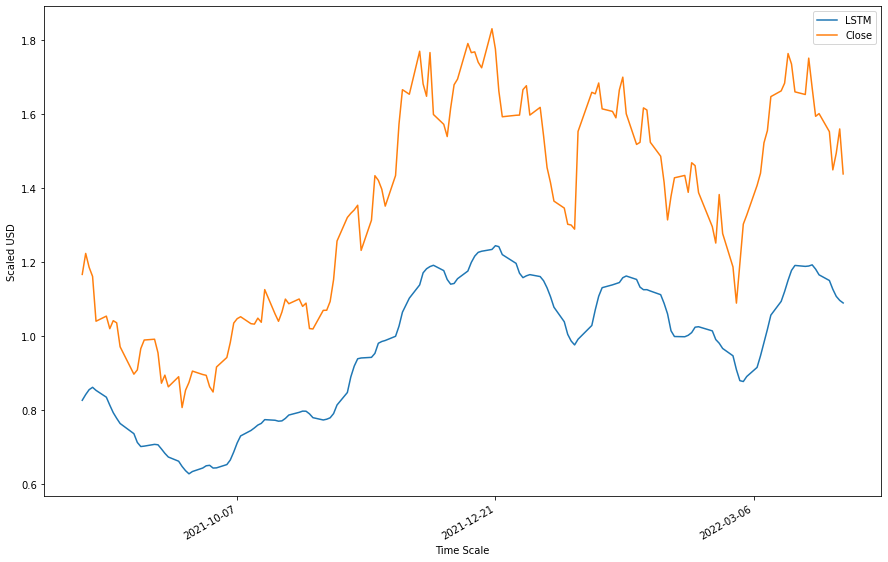

In [108]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr2)
thri=len(X12)-len(Xtstd2)
x_dates=data_dates[k:]
#h=stockh['Close']
n=n_steps-1
h=h_ft[thri+n:]
#h=h[k:]
plt.plot(Xtstd2, ypr3, label='LSTM')
plt.plot(Xtstd2, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### RMSE OG MAPE

In [109]:
rmse3=mean_squared_error(ytst2,ypr3,squared=False)
mape3=mean_absolute_percentage_error(ytst2,ypr3)
print("RSME:",rmse3)
print("MAPE:",mape3)

RSME: 0.4019304743822785
MAPE: 0.2806321238370924


In [110]:
Villa3=(rmse3+mape3)/2

## MAPE

Test RMSE: 17.327
Test MAPE: 0.083


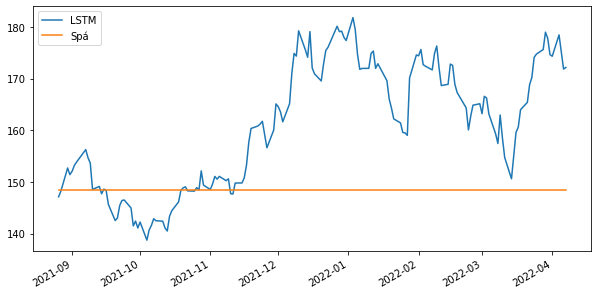

In [ ]:
train_split=0.8
split_idx2= int(np.ceil(len(stockh)*train_split))
tr=stockh[['Close']].iloc[:split_idx2]
tst=stockh[['Close']].iloc[split_idx2:]

tstpr=np.array([tr.rolling(10).mean().iloc[-1]]*len(tst)).reshape((-1,1))

print('Test RMSE: %.3f'%mean_squared_error(tst,tstpr,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst,tstpr))
f=len(tst)-len(h)
z=n-f
x_dates=stockh_dates[k+z:]


plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst, label='LSTM')
plt.plot(x_dates, tstpr, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test RMSE: 17.594
Test MAPE: 0.085


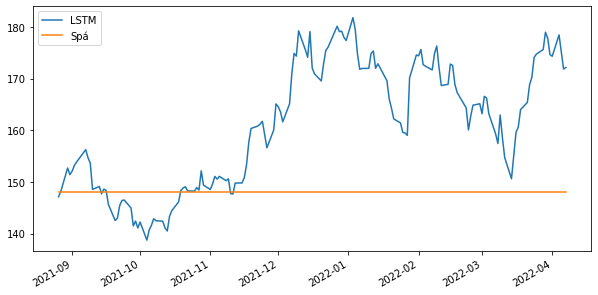

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

J=stockh[['Close']].values
train_split=0.8
split_idx3= int(np.ceil(len(J)*train_split))
tr2=J[:split_idx3]
tst2=J[split_idx3:]
tst_concat=np.array([]).reshape((0,1))

for i in range(len(tst2)):
  tr_fit=np.concatenate((tr2,np.asarray(tst_concat)))
  fit=SimpleExpSmoothing(np.asarray(tr_fit)).fit(smoothing_level=0.2)
  tst_pr=fit.forecast(1)
  tst_concat=np.concatenate((np.asarray(tst_concat),tst_pr.reshape((-1,1))))

print('Test RMSE: %.3f'%mean_squared_error(tst2,tst_concat,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst2,tst_concat))
f=len(tst2)-len(h)
z=n-f
x_dates=stockh_dates[k+z:]

plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst2, label='LSTM')
plt.plot(x_dates, tst_concat, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


## Val á modeli með minnstu villuna

In [130]:
smallest = 0
if Villa1 < Villa2 and Villa1 < Villa3 :
    smallest = 'Model1'
if Villa2 < Villa1 and Villa2 < Villa3 :
    smallest = 'Model2'
if Villa3 < Villa1 and Villa3 < Villa2 :
    smallest = 'Model3'
print(smallest, "er með minnstu villuna.")
print("Við veljum þá", smallest)

Model1 er með minnstu villuna.
Við veljum þá Model1


## fram í tímann

### val á gögnum

In [128]:
df1=data.reset_index()['Adj Close']
#df1

### Mynd af gögnum sem voru valin

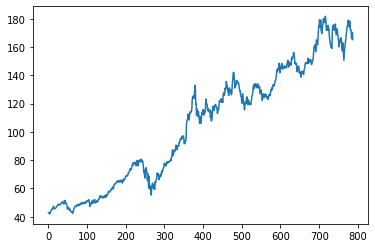

In [129]:
plt.plot(df1)

### Gagnavinnsla

In [197]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [198]:
#print(df1)

In [199]:
#training_size=int(len(df1)*0.65)
#test_size=len(df1)-training_size
#train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [200]:
#training_size,test_size

(538, 291)

In [201]:
#train_data

In [115]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [203]:
time_step = 100
Xtr1, ytr1 = create_dataset(train_data, time_step)
Xtst1, ytst1 = create_dataset(test_data, time_step)

In [204]:
print(X_train.shape), print(y_train.shape)

(437, 100)
(437,)


(None, None)

In [205]:
print(X_test.shape), print(ytest.shape)

(190, 100)
(190,)


(None, None)

In [206]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Modelið

In [ ]:
#model6 = keras.models.Sequential([
    #keras.layers.LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True),
    #keras.layers.LSTM(50,return_sequences=True),
    #keras.layers.LSTM(50),
    #keras.layers.Dense(1)])
#odel6.compile(loss="mean_squared_error", optimizer="adam")
#model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=2)

### Spágögn búin til

In [ ]:
train_predict=model6.predict(X_train)
test_predict=model6.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### RMSE 

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

89.87639459064552

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.17615148289707

### Mynd af einhverju (skoða)

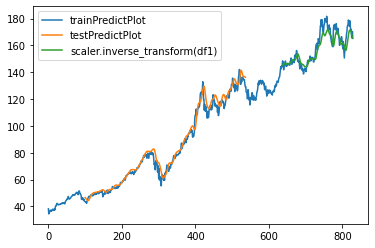

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['trainPredictPlot', 'testPredictPlot','scaler.inverse_transform(df1)'],loc='upper left')
plt.show()

### Framtíðargögn sett í fylki

In [ ]:
len(test_data)

291

In [ ]:
timi=len(test_data)-100


In [ ]:
x_input=test_data[timi:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#temp_input

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model6.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model6.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

829

In [ ]:
tim=len(df1)-100

### Mynd af spá ósamsett

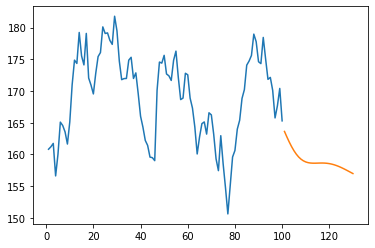

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[tim:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
timm=tim+30

### Mynd af spá samsett

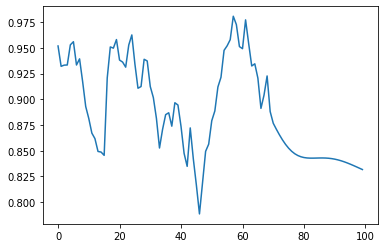

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[timm:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

### Mynd af heildargögnum með spá

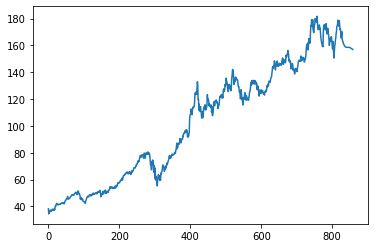

In [ ]:
plt.plot(df3)

## Fram í tímann (rusl)

In [ ]:
import math

In [ ]:
from numpy import newaxis

In [ ]:
import os
import json

In [ ]:
stockh_Close=stockh[['Close']]
stockh_Close

In [ ]:
target_y = stockh['Close']
X_feat= stockh.iloc[:,3:5]
h_feat=stockh.iloc[:,3]
X_feat

In [ ]:
#X_feat=np.array(X_feat)
#X_feat=X_feat.reshape(-1,1)

In [ ]:
X1, y1= lstm_split(X_feat.values, n_steps=1)

train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index=X_ft.index

Xtr, Xtst= X1[:split_idx], X1[split_idx:]
ytr, ytst= y1[:split_idx], y1[split_idx:]
Xtrd, Xtstd= date_index[:split_idx], date_index[split_idx:]

print(X1.shape, Xtr.shape, Xtst.shape, ytst.shape)

(783, 1, 1) (627, 1, 1) (156, 1, 1) (156,)


In [ ]:
model4 = keras.models.Sequential([
    keras.layers.LSTM(100,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100,activation="relu", return_sequences=True),
    keras.layers.LSTM(100,activation="relu", return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)])
model4.compile(loss="mean_squared_error", optimizer="adam")
model4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 1, 100)            40800     
                                                                 
 dropout_26 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_42 (LSTM)              (None, 1, 100)            80400     
                                                                 
 lstm_43 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_27 (Dropout)        (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-t

In [ ]:
historyn=model4.fit(Xtr,ytr,epochs=2,batch_size=32,verbose=2,shuffle=False)

Epoch 1/2
20/20 - 0s - loss: 18896696461230080.0000 - 161ms/epoch - 8ms/step
Epoch 2/2
20/20 - 0s - loss: 18891553237893120.0000 - 142ms/epoch - 7ms/step


In [ ]:
sc= StandardScaler()

In [ ]:
#X_ft = sc.fit_transform(X_feat.values)
#X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft,index=X_feat.index)

In [ ]:
X_FUTURE = 100
predictions = np.array([])
last = Xtst[-1]
for i in range(X_FUTURE):
  curr_prediction = model4.predict(np.array([last]))
  print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions = np.concatenate([predictions, curr_prediction[0]])
  predictions = sc.fit_transform([predictions])[0]
  predictions = sc.inverse_transform([predictions])[0]
print(predictions)

NameError: ignored

In [ ]:
stockh.index

DatetimeIndex(['2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15',
               ...
               '2022-03-25', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07'],
              dtype='datetime64[ns]', name='Date', length=783, freq=None)

In [ ]:
import datetime
from datetime import timedelta
dicts = []
curr_date = stockh.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")

IndexError: ignored

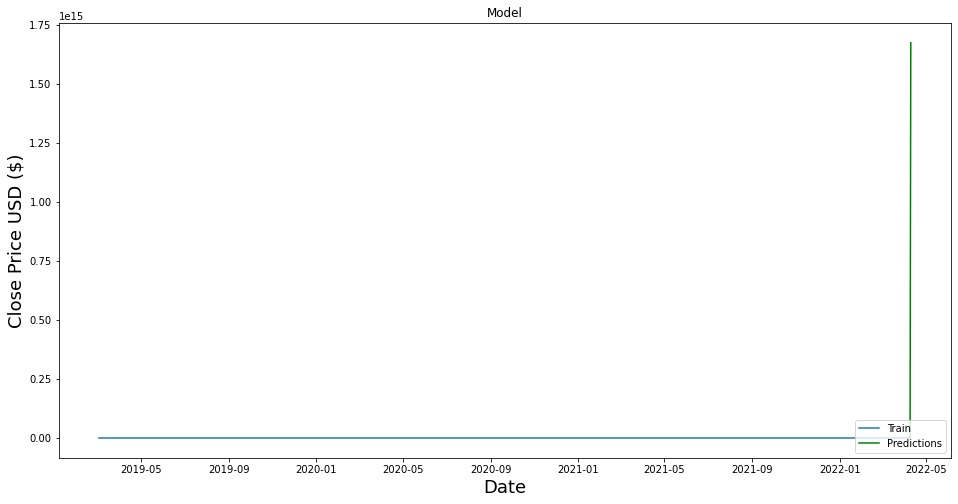

In [ ]:
#Plot the data
train = stockh
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(new_data['Predictions'],'g')
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

## Nett grafdót

In [ ]:
choice = input('Write a stock symbol:')
choice = choice.upper()
data = yf.download(tickers=choice, period = 'max', interval = '1d', rounding= True)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.add_trace(go.Scatter(x=data.index,y=data['MA5'],opacity=0.7,line=dict(color='blue', width=2),name='MA 5'))

fig.add_trace(go.Scatter(x=data.index,y=data['MA20'],opacity=0.7,line=dict(color='orange', width=2),name='MA 20'))
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
#dict(count=15, label='15m', step='minute', stepmode='backward'),
#dict(count=45, label='45m', step='minute', stepmode='backward'),
#dict(count=1, label='1h', step='hour', stepmode='backward'),
#dict(count=6, label='6h', step='hour', stepmode='backward'),
dict(count=30, label='30d', step='day', stepmode='backward'),
dict(count=3, label='3m', step='month', stepmode='backward'),
dict(count=6, label='6m', step='month', stepmode='backward'),
dict(count=1, label='YTD', step='year', stepmode='todate'),
dict(count=1, label='1y', step='year', stepmode='backward'),
dict(count=3, label='3y', step='year', stepmode='backward'),
dict(step='all')
])
)
)
fig.show()